In [ ]:
Tache 1

In [67]:
import pandas as pd
from sklearn.model_selection import *


data = pd.read_csv('C:/Users/kam2v/Documents/cours/ia/tp2/winequality-red.csv')
data.head()

x = data.drop("quality", axis=1)
y = data["quality"]

# Séparation des données en ensemble d'apprentissage et de test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Affichage des dimensions des ensembles
print("Dimensions de l'ensemble d'apprentissage :", x_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test :", x_test.shape, y_test.shape)
print("La dimension de l'ensemble de test est bien de 0.2 fois l'ensemble d'apprentissage")




Dimensions de l'ensemble d'apprentissage : (1279, 11) (1279,)
Dimensions de l'ensemble de test : (320, 11) (320,)
La dimension de l'ensemble de test est bien de 0.2 fois l'ensemble d'apprentissage


In [ ]:
Tache2

In [68]:
import numpy as np

# moyenne et écart type des données d'apprentissage (on laisse y de coté, étant la cible)
moyenne_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
print("Les données ont pour moyenne: \n",moyenne_train)
print("Les données ont pour écart type:\n",std_train)

# application de la loi normale sur les données d'entrainement
x_train_standard = (x_train - moyenne_train) / std_train


# puis sur les données de test
x_test_standard = (x_test - moyenne_train) / std_train


Les données ont pour moyenne: 
 fixed acidity            8.304613
volatile acidity         0.525426
citric acid              0.272963
residual sugar           2.542494
chlorides                0.087214
free sulfur dioxide     15.779124
total sulfur dioxide    46.182174
density                  0.996725
pH                       3.310993
sulphates                0.654934
alcohol                 10.427508
dtype: float64
Les données ont pour écart type:
 fixed acidity            1.701842
volatile acidity         0.179907
citric acid              0.192647
residual sugar           1.392274
chlorides                0.047324
free sulfur dioxide     10.523006
total sulfur dioxide    32.375147
density                  0.001868
pH                       0.152124
sulphates                0.163578
alcohol                  1.070020
dtype: float64


In [69]:
Tache 3


SyntaxError: invalid syntax (3810305591.py, line 1)

In [15]:
from keras.models import Sequential
from keras.layers import Input, Dense
import os
from keras.callbacks import ModelCheckpoint 

def get_model(input_shape):
    model = Sequential()
    
    # layer d'entrée
    model.add(Input(shape=input_shape))
    
    # layer cachés
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))

    #layer de sortie
    model.add(Dense(1))

    return model



# Exemple
input_shape = x_train.shape[1]  
wine_model = get_model(input_shape)
#résumé
wine_model.summary()

# Compilation
wine_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mse'])

# callback
model_folder = 'models/wine/best_model.h5'
os.makedirs('models/wine', exist_ok=True)
save_callback = ModelCheckpoint(filepath=model_folder, verbose=0, save_best_only=True)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1536      
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5697 (22.25 KB)
Trainable params: 5697 (22.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Tache 4

In [70]:
epochs=50
batch_size=8
history = wine_model.fit(
    x=x_train_standard,  
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_standard, y_test),  
    callbacks=[save_callback]  
)


Epoch 1/50
160/160 [==============================] - 1s 3ms/step - loss: 0.2062 - mae: 0.2940 - mse: 0.2062 - val_loss: 0.1787 - val_mae: 0.2813 - val_mse: 0.1787
Epoch 2/50
 23/160 [===>..........................] - ETA: 0s - loss: 0.1868 - mae: 0.2911 - mse: 0.1868

C:\Users\kam2v\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 0s 3ms/step - loss: 0.1865 - mae: 0.2826 - mse: 0.1865 - val_loss: 0.1981 - val_mae: 0.3292 - val_mse: 0.1981
Epoch 3/50
160/160 [==============================] - 0s 3ms/step - loss: 0.1666 - mae: 0.2756 - mse: 0.1666 - val_loss: 0.1764 - val_mae: 0.2979 - val_mse: 0.1764
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1612 - mae: 0.2721 - mse: 0.1612 - val_loss: 0.1988 - val_mae: 0.3244 - val_mse: 0.1988
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1496 - mae: 0.2696 - mse: 0.1496 - val_loss: 0.1595 - val_mae: 0.2770 - val_mse: 0.1595
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1449 - mae: 0.2663 - mse: 0.1449 - val_loss: 0.1757 - val_mae: 0.2928 - val_mse: 0.1757
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.1421 - mae: 0.2664 - mse: 0.1421 - val_loss: 0.1915 - val_mae: 0.3216 - val_mse: 0.1915
Epoch 8/50
160/160 [=======

In [ ]:
Tache 5

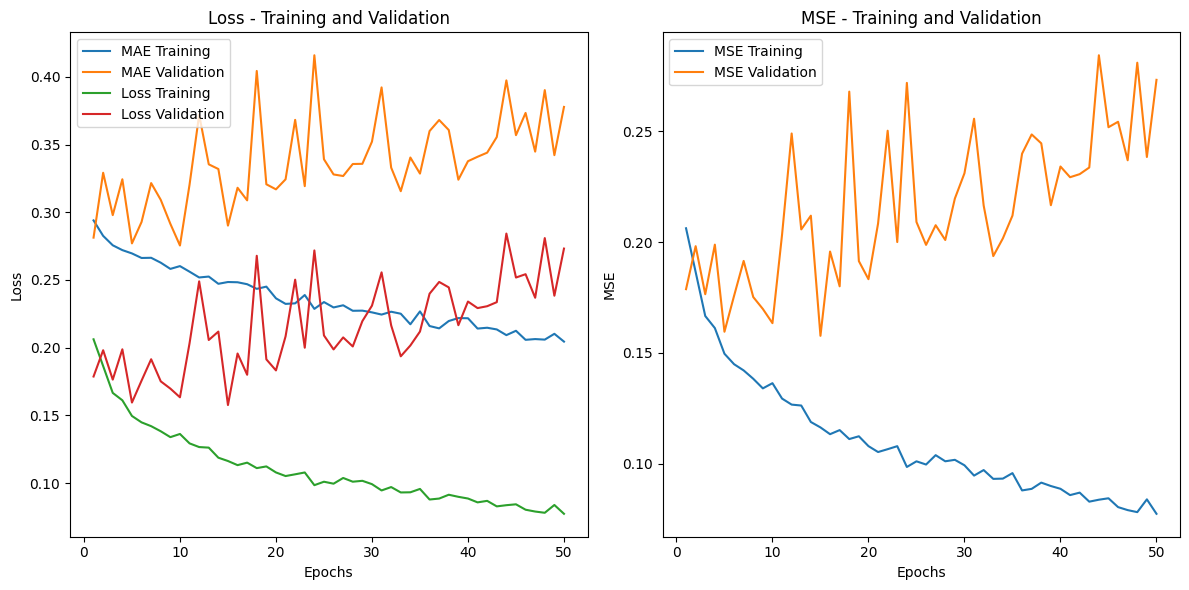

In [71]:
import matplotlib.pyplot as plt

mae_train = history.history['mae']
mae_val = history.history['val_mae']
mse_train= history.history['mse']
mse_val= history.history['val_mse']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mae_train, label='MAE Training')
plt.plot(range(1, epochs + 1), mae_val, label='MAE Validation')
plt.title('MAE - Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_train, label='Loss Training')
plt.plot(range(1, epochs + 1), loss_val, label='Loss Validation')
plt.title('Loss - Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), mse_train, label='MSE Training')
plt.plot(range(1, epochs + 1), mse_val, label='MSE Validation')
plt.title('MSE - Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()



In [52]:
Tache 6
Questions
‚ Comment est-il possible d’interpréter les courbes d’apprentissage obtenues ?
Comme attendu, les courbes de loss et de MSE sont les mêmes. Grace au courbes du MSE, nous pouvons voir que les pertes importantes sont minimes et plus petites que les pertes générales. Le modèle ne créé pas d'anomalies.
‚ Qu’en est t’il de la performance moyenne de notre modèle pour la prédiction de la qualité du vin ?
Les courbes de perte étant très proches de 0, le modèle de prédiction est donc très performant.



SyntaxError: invalid character '‚' (U+201A) (325881480.py, line 3)

In [72]:
from keras.models import load_model

best_model = load_model('models/wine/best_model.h5')
evaluation_results = best_model.evaluate(x_test_standard, y_test)

# resultats
for metric_name, result in zip(best_model.metrics_names, evaluation_results):
    print(metric_name, ":", round(result, 4))
print("le loss est bien pareil que le MSE")


10/10 [==============================] - 0s 2ms/step - loss: 0.1577 - mae: 0.2902 - mse: 0.1577
loss : 0.1577
mae : 0.2902
mse : 0.1577
le loss est bien pareil que le MSE
